In [75]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import pickle

In [76]:
path = 'Lab4/RegressData001.p'
D = pickle.load(open(path, 'rb'))
D.keys()
x = D['x']
y = D['y']

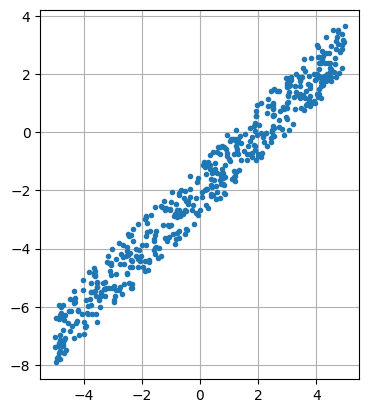

In [77]:
plt.plot(x.T, y.T, '.')
plt.grid(True)
plt.axis('scaled')
plt.show()

In [78]:
X = np.vstack((np.ones(x.shape), x))
import scipy.linalg as la
Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
w = np.dot(la.inv(Rx), rxy)
print(w)

[[-2.01391133]
 [ 0.99728753]]


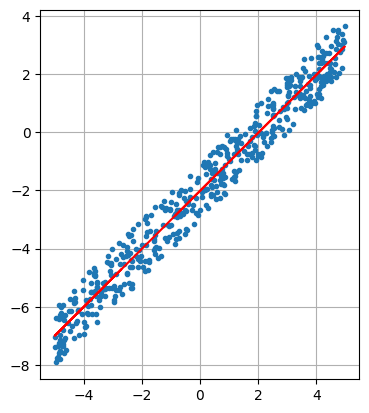

In [79]:
ye = np.dot(w.T, X)
plt.plot(x.T, y.T, '.')
plt.plot(x.T, ye.T, 'r-')
plt.axis('scaled')
plt.grid(True)
plt.show()

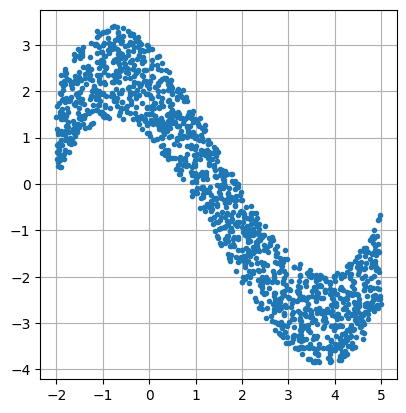

In [80]:
path='Lab4/RegressData002.p'
D = pickle.load(open(path, 'rb'))
D.keys()
x = D['x']
y = D['y']
plt.plot(x.T, y.T, '.')
plt.grid(True)
plt.axis('scaled')
plt.show()

In [81]:
X = np.vstack((np.ones(x.shape), x,x**2,x**3))
Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
w = np.dot(la.inv(Rx), rxy)
print(w)

[[ 2.01160905]
 [-0.98245165]
 [-0.51315283]
 [ 0.11294984]]


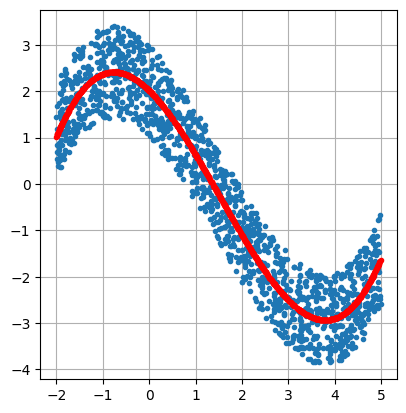

In [82]:
ye = np.dot(w.T, X)
e = y-ye
plt.plot(x.T, y.T, '.')
plt.plot(x.T, ye.T, 'r.')
plt.axis('scaled')
plt.grid(True)
plt.show()

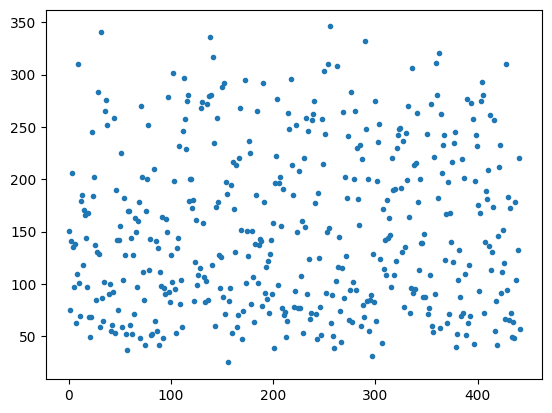

In [83]:
import sklearn.datasets as dt
D = dt.load_diabetes()
X = D.data
y = D.target
plt.plot(y, '.')


In [84]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, random_state=42)
X1n = np.vstack((np.ones(294), X1.T))
Rx = np.dot(X1n, X1n.T)
rxy = np.dot(X1n, y1.T)
w = np.dot(la.inv(Rx), rxy)
print(w)

my = np.mean(y2)
vy = np.sum((y2-my)**2)

X2n = np.vstack((np.ones(148), X2.T))
y2e = np.dot(w.T, X2n)
pe = np.sum((y2e-y2)**2)
R2 = 1-pe/vy
print(R2)

[ 150.47050072   32.14114954 -243.77454184  560.321881    406.14449765
 -715.97724955  394.56874273    9.54562174  172.52820314  626.90587608
  -21.05781046]
0.5117088779840551


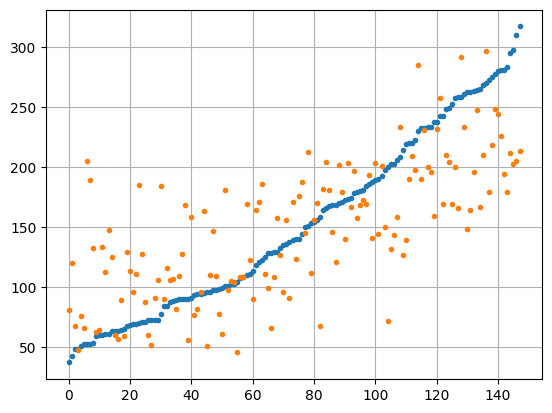

In [85]:
idx = np.argsort(y2)
plt.plot(y2[idx], '.')
plt.plot(y2e[idx], '.')
plt.grid(True)
plt.show()

0.13867532906277635


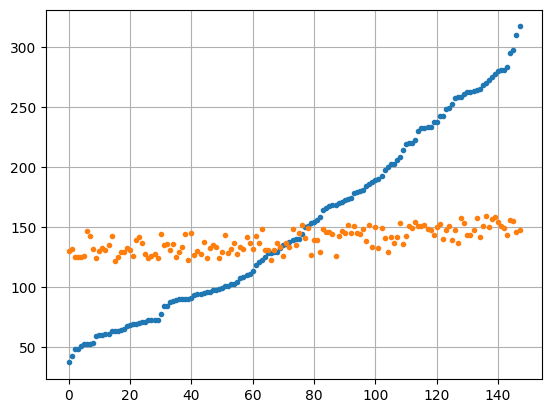

In [86]:
from sklearn.svm import SVR
svr = SVR().fit(X1, y1)
y2ee = svr.predict(X2)

print(svr.score(X2, y2))

idx = np.argsort(y2)
plt.plot(y2[idx], '.')
plt.plot(y2ee[idx], '.')
plt.grid(True)
plt.show()



In [87]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression().fit(X1, y1)
wb = lr.coef_
yb = lr.intercept_

In [88]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2).fit(X1)
X1p = pf.transform(X1)
print(X1p[:4, :10])

[[ 1.          0.0090156   0.05068012 -0.00512814 -0.06419889  0.06998059
   0.0838625  -0.03971921  0.07120998  0.03954249]
 [ 1.          0.03807591  0.05068012 -0.00943939  0.00235142  0.00118295
   0.03751653 -0.05444576  0.05017634 -0.02595311]
 [ 1.          0.02717829  0.05068012  0.0250506   0.01498668  0.0259501
   0.04847673 -0.03971921  0.03430886  0.00783843]
 [ 1.         -0.04183994 -0.04464164  0.12852056  0.0631866  -0.03321588
  -0.03262872  0.01182372 -0.03949338 -0.01599887]]


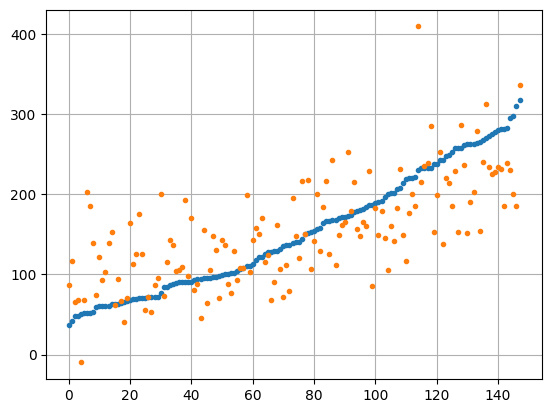

0.46192411323719196

In [89]:
pf = PolynomialFeatures(2,include_bias=False).fit(X1)
X1p = pf.transform(X1)
X2p = pf.transform(X2)
lr = LinearRegression().fit(X1p, y1)
y2ee = lr.predict(X2p)
plt.plot(y2[idx], '.')
plt.plot(y2ee[idx], '.')
plt.grid(True)
plt.show()
lr.score(X2p, y2)

-296.2691471212349


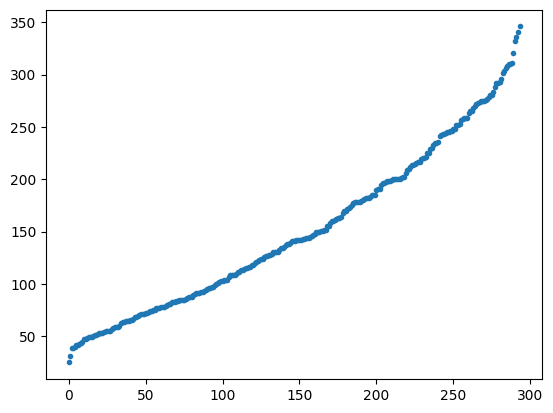

In [90]:
pf = PolynomialFeatures(degree=3,include_bias=False).fit(X1)
X1p = pf.transform(X1)
lr = LinearRegression().fit(X1p, y1)
lr.score(X1p, y1)
idx1 = np.argsort(y1)
plt.plot(y1[idx1], '.')

X2p = pf.transform(X2)
y2ee = lr.predict(X2p)
print(lr.score(X2p, y2))


In [92]:
from sklearn.linear_model import Lasso,Ridge
l2 = Ridge().fit(X1p, y1)
print(l2.score(X2p, y2))

0.44574030075312077


In [93]:
l1 = Lasso().fit(X1p, y1)
print(l1.score(X2p, y2))

0.36455708608858517
